# Preprocessing Data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import json

folder_path_data_train = "/content/drive/MyDrive/liputan6_data/canonical/train2"

json_files = [f for f in os.listdir(folder_path_data_train) if f.endswith('.json')]

data_list = []

for file in json_files:
    file_path = os.path.join(folder_path_data_train, file)

    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

        if isinstance(data, list):
            data_list.extend(data)
        else:
            data_list.append(data)

data_train = pd.DataFrame(data_list)

In [ ]:
print(f"Jumlah baris: {len(data_train)}")
print(f"Kolom yang tersedia: {data_train.columns}")


Jumlah baris: 23841
Kolom yang tersedia: Index(['id', 'url', 'clean_article', 'clean_summary', 'extractive_summary'], dtype='object')


In [ ]:
import os
import pandas as pd
import json

folder_path_data_val = "/content/drive/MyDrive/liputan6_data/canonical/dev"

json_files = [f for f in os.listdir(folder_path_data_val) if f.endswith('.json')]

data_list = []

for file in json_files:
    file_path = os.path.join(folder_path_data_val, file)

    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

        if isinstance(data, list):
            data_list.extend(data)
        else:
            data_list.append(data)

data_val = pd.DataFrame(data_list)

In [ ]:
print(f"Jumlah baris: {len(data_val)}")
print(f"Kolom yang tersedia: {data_val.columns}")

Jumlah baris: 5131
Kolom yang tersedia: Index(['id', 'url', 'clean_article', 'clean_summary', 'extractive_summary'], dtype='object')


In [ ]:
import os
import pandas as pd
import json

folder_path_data_test = "/content/drive/MyDrive/liputan6_data/canonical/test"

json_files = [f for f in os.listdir(folder_path_data_test) if f.endswith('.json')]

data_list = []

for file in json_files:
    file_path = os.path.join(folder_path_data_test, file)

    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

        if isinstance(data, list):
            data_list.extend(data)
        else:
            data_list.append(data)

data_test = pd.DataFrame(data_list)

In [ ]:
print(f"Jumlah baris: {len(data_test)}")
print(f"Kolom yang tersedia: {data_test.columns}")

Jumlah baris: 900
Kolom yang tersedia: Index(['id', 'url', 'clean_article', 'clean_summary', 'extractive_summary'], dtype='object')


In [ ]:
data_train['clean_article'].head()

,clean_article
0,"[[Liputan6, ., com, ,, Brebes, :, Suasana, duk..."
1,"[[Liputan6, ., com, ,, Jakarta, :, Kepala, Pol..."
2,"[[Liputan6, ., com, ,, Surabaya, :, Pasukan, T..."
3,"[[Liputan6, ., com, ,, Kediri, :, Slamet, Riya..."
4,"[[Liputan6, ., com, ,, Mataram, :, Sekitar, 30..."


## Gabungkan Kata yang Di Tokenisasi menjadi Kalimat

In [ ]:
def detokenize_text(data_list):
    articles = [" ".join(sum(item[1]['clean_article'], [])) for item in data_list.iterrows()] # Accessing the Series (item[1]) and then the column
    summaries = [" ".join(sum(item[1]['clean_summary'], [])) for item in data_list.iterrows()] # Accessing the Series (item[1]) and then the column
    return articles, summaries

In [ ]:
train_articles, train_summaries = detokenize_text(data_train)
test_articles, test_summaries = detokenize_text(data_test)
val_articles, val_summaries = detokenize_text(data_val)

In [ ]:
data_train["detokenized_article"] = train_articles
data_train["detokenized_summary"] = train_summaries
data_test["detokenized_article"] = test_articles
data_test["detokenized_summary"] = test_summaries
data_val["detokenized_article"] = val_articles
data_val["detokenized_summary"] = val_summaries

In [ ]:
data_train.head()

,id,url,clean_article,clean_summary,extractive_summary,detokenized_article,detokenized_summary
0,65461,https://www.liputan6.com/news/read/65461/delap...,"[[Liputan6, ., com, ,, Brebes, :, Suasana, duk...","[[Kedelapan, jenazah, akhirnya, dimakamkan, se...","[1, 2]","Liputan6 . com , Brebes : Suasana duka menyeli...",Kedelapan jenazah akhirnya dimakamkan secara b...
1,65507,https://www.liputan6.com/news/read/65507/kapol...,"[[Liputan6, ., com, ,, Jakarta, :, Kepala, Pol...","[[Doktor, Azhari, lolos, dari, sergapan, polis...","[4, 6, 9, 2]","Liputan6 . com , Jakarta : Kepala Polri Jender...",Doktor Azhari lolos dari sergapan polisi di pe...
2,56708,https://www.liputan6.com/news/read/56708/tni-a...,"[[Liputan6, ., com, ,, Surabaya, :, Pasukan, T...","[[Saat, mengunjungi, daerah, konflik, ,, rombo...","[6, 1, 9]","Liputan6 . com , Surabaya : Pasukan TNI Angkat...","Saat mengunjungi daerah konflik , rombongan pe..."
3,53924,https://www.liputan6.com/news/read/53924/kejar...,"[[Liputan6, ., com, ,, Kediri, :, Slamet, Riya...","[[Slamet, Riyadi, ,, Direktur, PT, Maju, Rubbe...","[0, 4]","Liputan6 . com , Kediri : Slamet Riyadi , Dire...","Slamet Riyadi , Direktur PT Maju Rubber Indust..."
4,54274,https://www.liputan6.com/news/read/54274/pemer...,"[[Liputan6, ., com, ,, Mataram, :, Sekitar, 30...","[[Ratusan, TKI, minta, pemerintah, negara-nega...","[5, 8]","Liputan6 . com , Mataram : Sekitar 300 tenaga ...",Ratusan TKI minta pemerintah negara-negara ASE...


In [ ]:
data_test.head()

,id,url,clean_article,clean_summary,extractive_summary,detokenized_article,detokenized_summary
0,13352,https://www.liputan6.com/news/read/13352/penye...,"[[Liputan6, ., com, ,, Batam, :, Petugas, Bea,...","[[Penyelundupan, ribuan, ton, kayu, gelondonga...","[0, 6]","Liputan6 . com , Batam : Petugas Bea Cukai Tan...",Penyelundupan ribuan ton kayu gelondongan dan ...
1,13634,https://www.liputan6.com/news/read/13634/presi...,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, A...","[[Rancangan, pelimpahan, wewenang, dan, tugas,...","[0, 7]","Liputan6 . com , Jakarta : Presiden Abdurrahma...",Rancangan pelimpahan wewenang dan tugas konsti...
2,13615,https://www.liputan6.com/news/read/13615/ratus...,"[[Liputan6, ., com, ,, Jember, :, Sebanyak, 39...","[[PT, Pusri, tak, lagi, menyewa, 394, gerbong,...","[0, 8, 2]","Liputan6 . com , Jember : Sebanyak 394 gerbong...",PT Pusri tak lagi menyewa 394 gerbong milik PT...
3,13757,https://www.liputan6.com/news/read/13757/hengk...,"[[Liputan6, ., com, ,, Jakarta, :, Setelah, me...","[[Artis, Hengky, Tornando, dijadikan, tahanan,...","[1, 9]","Liputan6 . com , Jakarta : Setelah menjalani p...",Artis Hengky Tornando dijadikan tahanan resmi ...
4,13311,https://www.liputan6.com/news/read/13311/pasuk...,"[[Liputan6, ., com, ,, Jakarta, :, Sekitar, li...","[[Pasukan, pengamanan, KTT, G-15, menggelar, a...","[1, 3]","Liputan6 . com , Jakarta : Sekitar lima ribu p...",Pasukan pengamanan KTT G-15 menggelar apel sia...


In [ ]:
data_val.head()

,id,url,clean_article,clean_summary,extractive_summary,detokenized_article,detokenized_summary
0,5448,https://www.liputan6.com/news/read/5448/je-sah...,"[[Liputan6, ., com, ,, Jakarta, :, Presiden, A...","[[Mekanisme, pemilihan, Ketua, MA, tak, lepas,...","[14, 15]","Liputan6 . com , Jakarta : Presiden Abdurrahma...",Mekanisme pemilihan Ketua MA tak lepas dari ke...
1,941,https://www.liputan6.com/news/read/941/instruk...,"[[Liputan6, ., com, ,, Jakarta, :, Kepolisian,...","[[Kepolisian, Republik, Indonesia, merespon, p...","[0, 2]","Liputan6 . com , Jakarta : Kepolisian Republik...",Kepolisian Republik Indonesia merespon perinta...
2,2056,https://www.liputan6.com/news/read/2056/buruh-...,"[[Liputan6, ., com, ,, Jakarta, :, Upah, minum...","[[Rata-rata, buruh, di, Kalideres, Jakarta, me...","[3, 8]","Liputan6 . com , Jakarta : Upah minumum region...",Rata-rata buruh di Kalideres Jakarta mengaku m...
3,4550,https://www.liputan6.com/news/read/4550/tiga-p...,"[[Liputan6, ., com, ,, Jakarta, :, Para, nasab...","[[Tiga, orang, tersangka, perampok, yang, seri...","[1, 2]","Liputan6 . com , Jakarta : Para nasabah bank d...",Tiga orang tersangka perampok yang sering meng...
4,4288,https://www.liputan6.com/news/read/4288/dua-ca...,"[[Liputan6, ., com, ,, Jakarta, :, Sebanyak, 1...","[[Sistem, gugur, pemilihan, calon, Ketua, MA, ...","[2, 20]","Liputan6 . com , Jakarta : Sebanyak 12 Hakim A...",Sistem gugur pemilihan calon Ketua MA sudah te...


## Data Understanding

In [ ]:
import re

def remove_punctuation(text):
  text = re.sub(r'[^\w\s]', '', text)
  return text

data_train['detokenized_article'] = data_train['detokenized_article'].apply(remove_punctuation)
data_train['detokenized_summary'] = data_train['detokenized_summary'].apply(remove_punctuation)

data_val['detokenized_article'] = data_val['detokenized_article'].apply(remove_punctuation)
data_val['detokenized_summary'] = data_val['detokenized_summary'].apply(remove_punctuation)

data_test['detokenized_article'] = data_test['detokenized_article'].apply(remove_punctuation)
data_test['detokenized_summary'] = data_test['detokenized_summary'].apply(remove_punctuation)


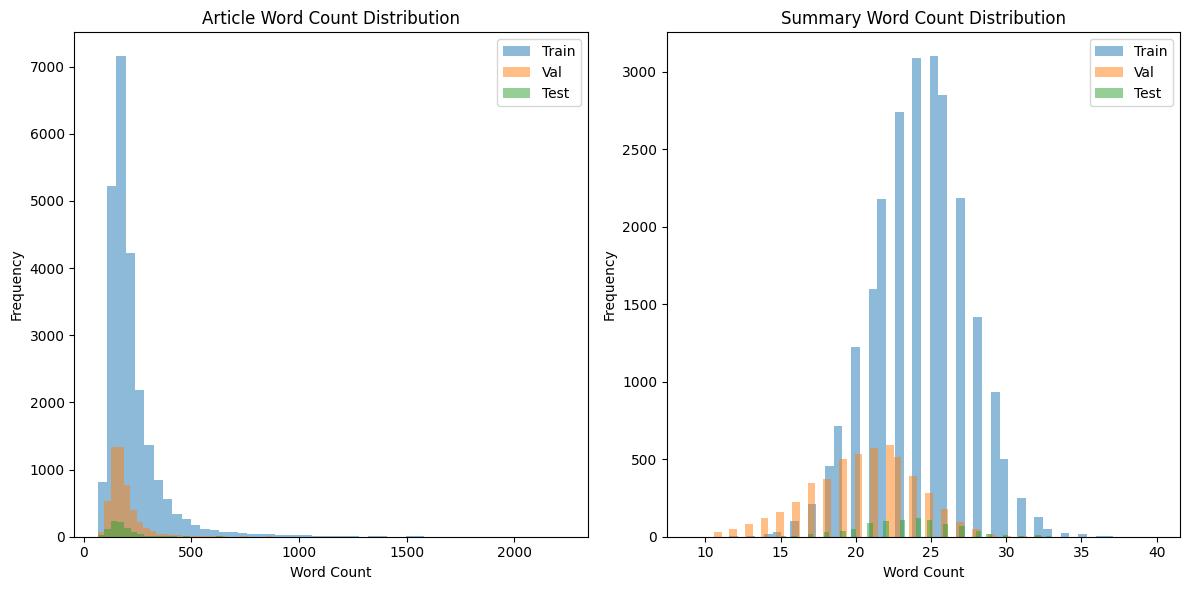

In [ ]:
# Word Count Stats
import matplotlib.pyplot as plt

def word_count_stats(df, column_name, label):
    df[column_name] = df[column_name].astype(str)
    word_counts = df[column_name].apply(lambda x: len(x.split()))
    return word_counts

train_article_word_counts = word_count_stats(data_train, 'detokenized_article', 'article')
val_article_word_counts = word_count_stats(data_val, 'detokenized_article', 'article')
test_article_word_counts = word_count_stats(data_test, 'detokenized_article', 'article')

train_summary_word_counts = word_count_stats(data_train, 'detokenized_summary', 'summaries')
val_summary_word_counts = word_count_stats(data_val, 'detokenized_summary', 'summaries')
test_summary_word_counts = word_count_stats(data_test, 'detokenized_summary', 'summaries')


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(train_article_word_counts, bins=50, alpha=0.5, label='Train')
plt.hist(val_article_word_counts, bins=50, alpha=0.5, label='Val')
plt.hist(test_article_word_counts, bins=50, alpha=0.5, label='Test')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Article Word Count Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(train_summary_word_counts, bins=50, alpha=0.5, label='Train')
plt.hist(val_summary_word_counts, bins=50, alpha=0.5, label='Val')
plt.hist(test_summary_word_counts, bins=50, alpha=0.5, label='Test')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Summary Word Count Distribution')
plt.legend()

plt.tight_layout()
plt.show()


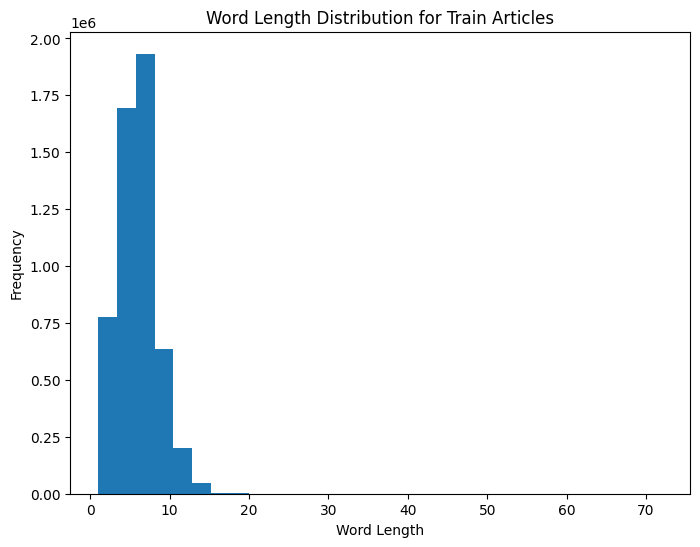

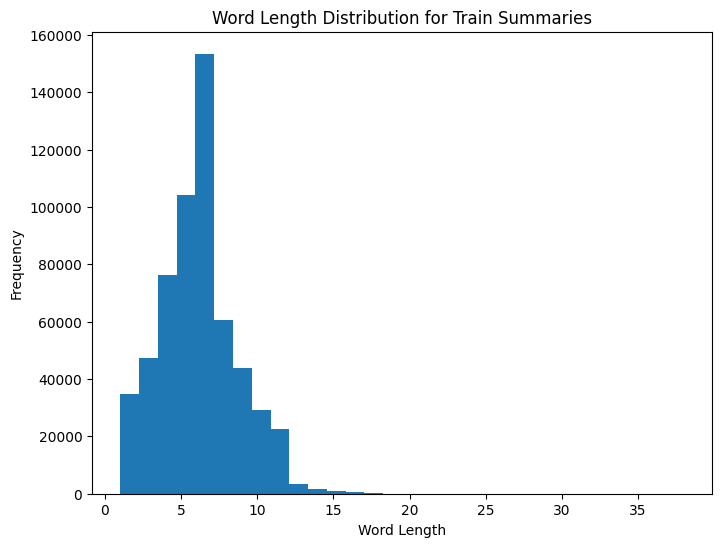

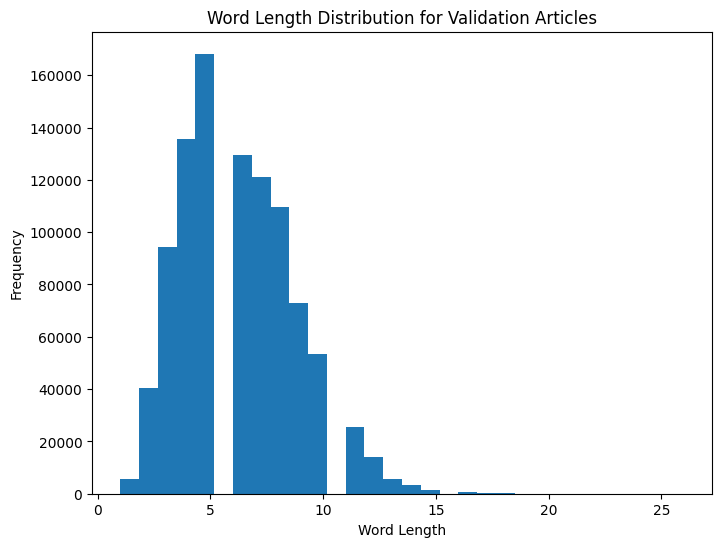

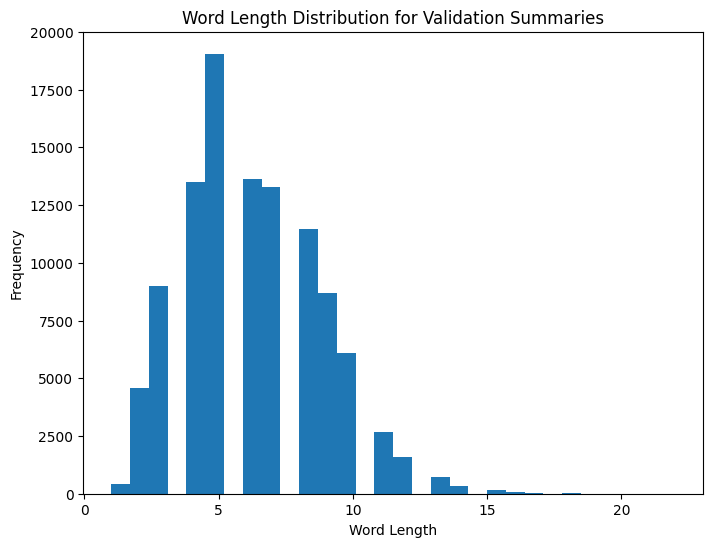

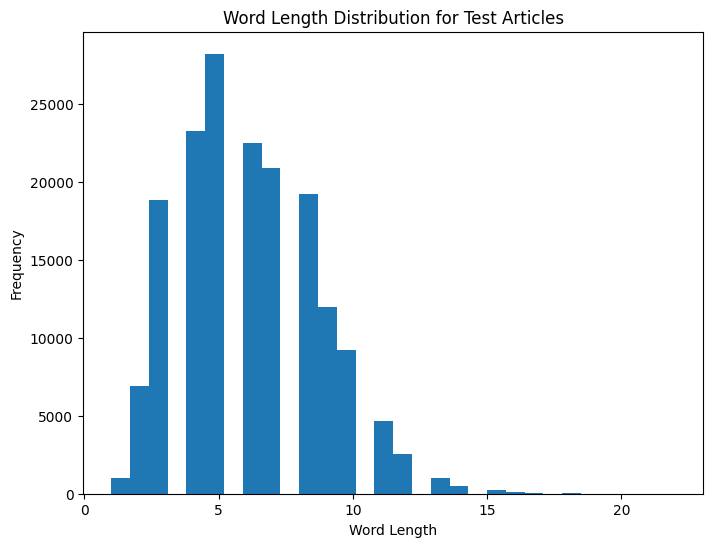

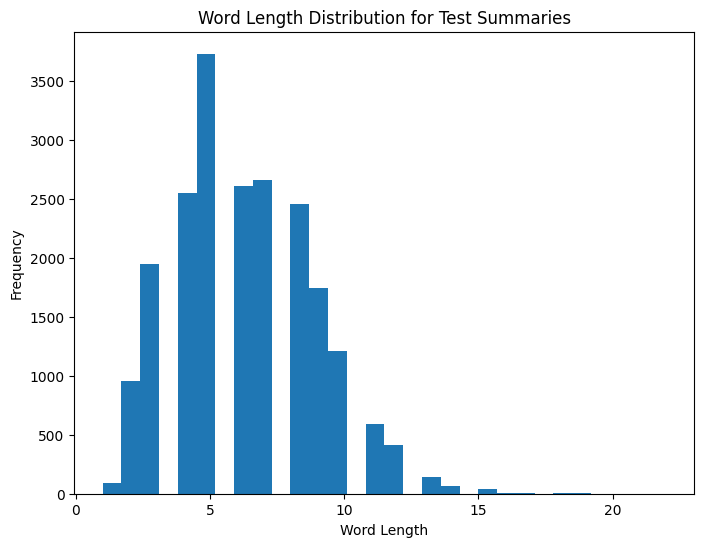

In [ ]:
# Word Lenght Distribution
def plot_word_length_distribution(df, column_name, label):
    df[column_name] = df[column_name].astype(str)
    word_lengths = df[column_name].apply(lambda x: [len(word) for word in x.split()])

    plt.figure(figsize=(8, 6))
    plt.hist([length for sublist in word_lengths for length in sublist], bins=30)
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.title(f'Word Length Distribution for {label}')
    plt.show()

plot_word_length_distribution(data_train, 'detokenized_article', 'Train Articles')
plot_word_length_distribution(data_train, 'detokenized_summary', 'Train Summaries')
plot_word_length_distribution(data_val, 'detokenized_article', 'Validation Articles')
plot_word_length_distribution(data_val, 'detokenized_summary', 'Validation Summaries')
plot_word_length_distribution(data_test, 'detokenized_article', 'Test Articles')
plot_word_length_distribution(data_test, 'detokenized_summary', 'Test Summaries')


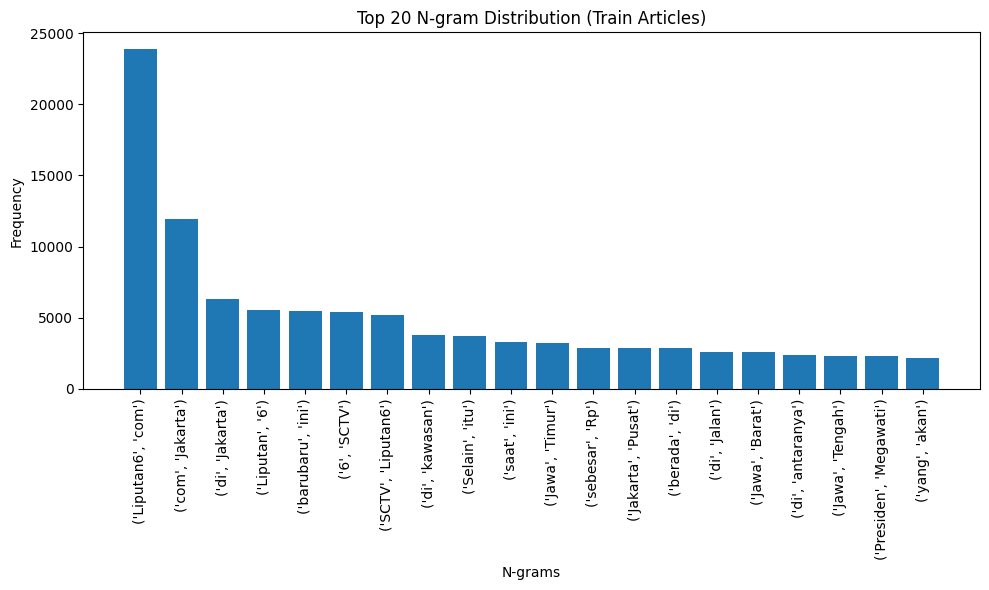

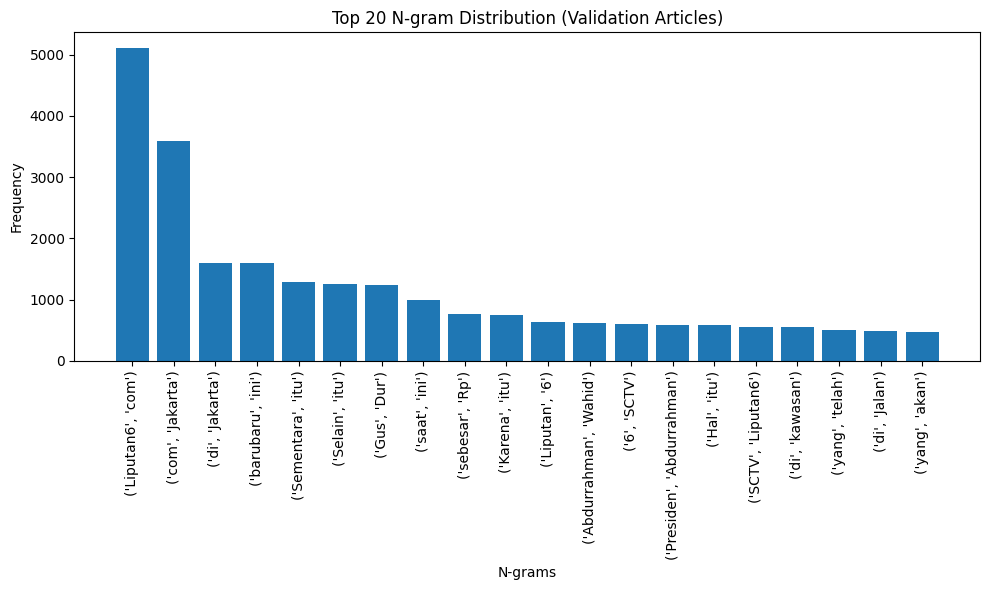

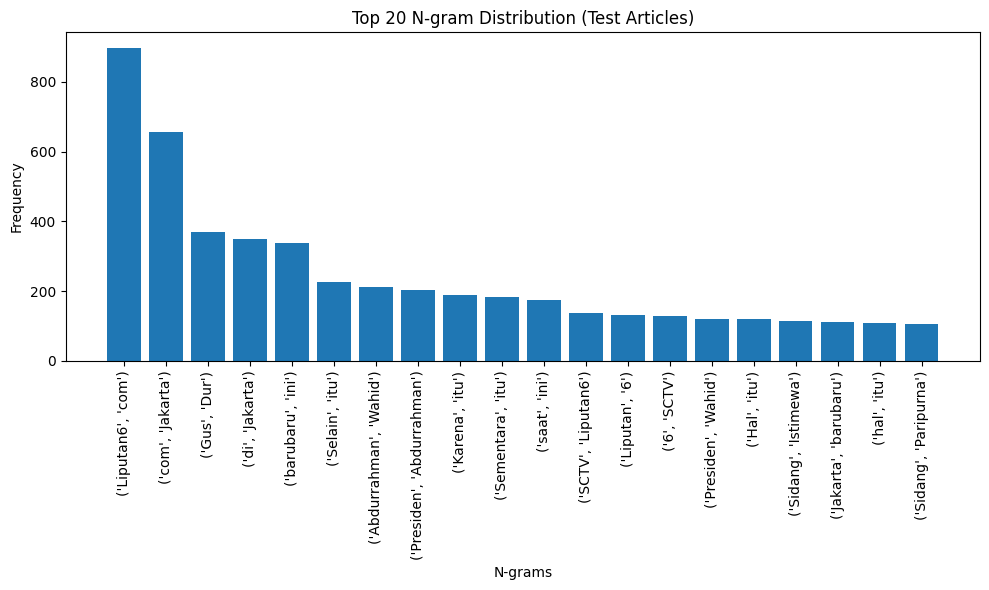

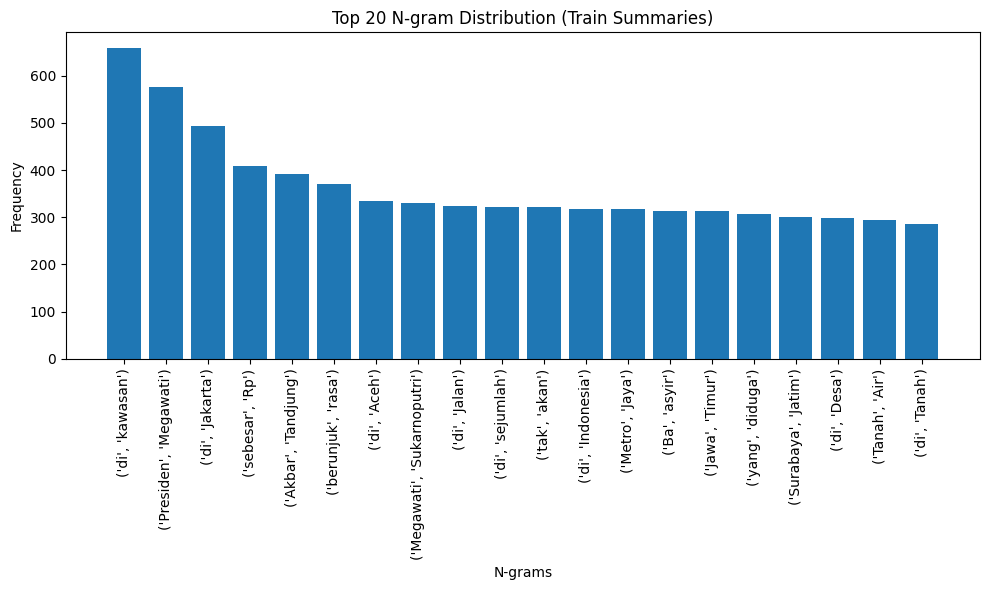

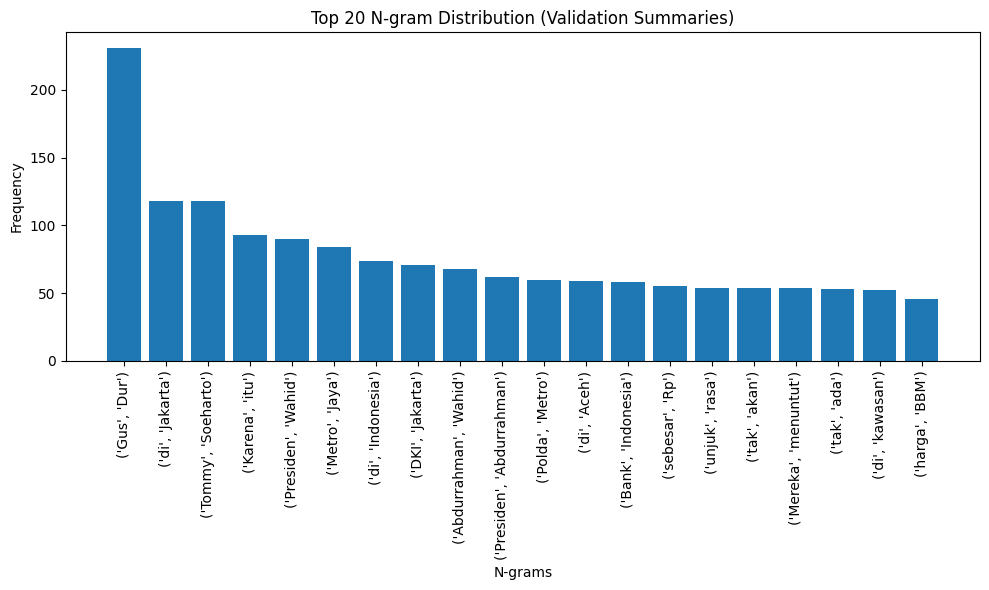

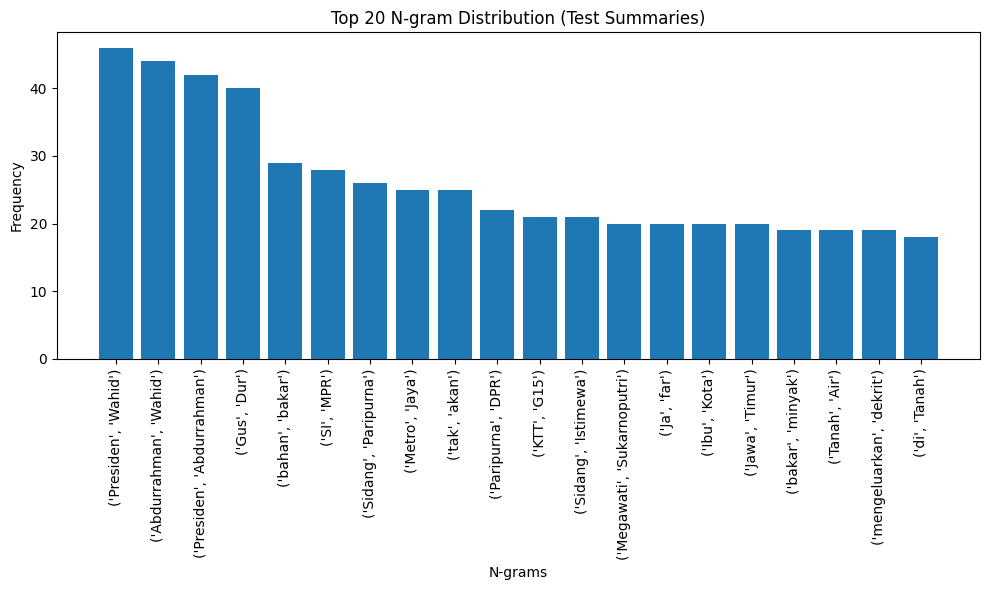

In [ ]:
# n gram Distribution
from collections import defaultdict

def calculate_ngram_distribution(text, n):
    ngram_counts = defaultdict(int)
    words = text.split()
    for i in range(len(words) - n + 1):
        ngram = tuple(words[i:i+n])
        ngram_counts[ngram] += 1
    return ngram_counts

def plot_ngram_distribution(ngram_counts, label):
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda item: item[1], reverse=True)
    ngrams = [str(ngram) for ngram, count in sorted_ngrams[:20]]
    counts = [count for ngram, count in sorted_ngrams[:20]]

    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, counts)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(f"Top 20 N-gram Distribution ({label})")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

n = 2  # Set n for n-grams
train_article_ngrams = calculate_ngram_distribution(" ".join(data_train['detokenized_article']), n)
plot_ngram_distribution(train_article_ngrams, "Train Articles")

val_article_ngrams = calculate_ngram_distribution(" ".join(data_val['detokenized_article']), n)
plot_ngram_distribution(val_article_ngrams, "Validation Articles")

test_article_ngrams = calculate_ngram_distribution(" ".join(data_test['detokenized_article']), n)
plot_ngram_distribution(test_article_ngrams, "Test Articles")

train_summary_ngrams = calculate_ngram_distribution(" ".join(data_train['detokenized_summary']), n)
plot_ngram_distribution(train_summary_ngrams, "Train Summaries")

val_summary_ngrams = calculate_ngram_distribution(" ".join(data_val['detokenized_summary']), n)
plot_ngram_distribution(val_summary_ngrams, "Validation Summaries")

test_summary_ngrams = calculate_ngram_distribution(" ".join(data_test['detokenized_summary']), n)
plot_ngram_distribution(test_summary_ngrams, "Test Summaries")


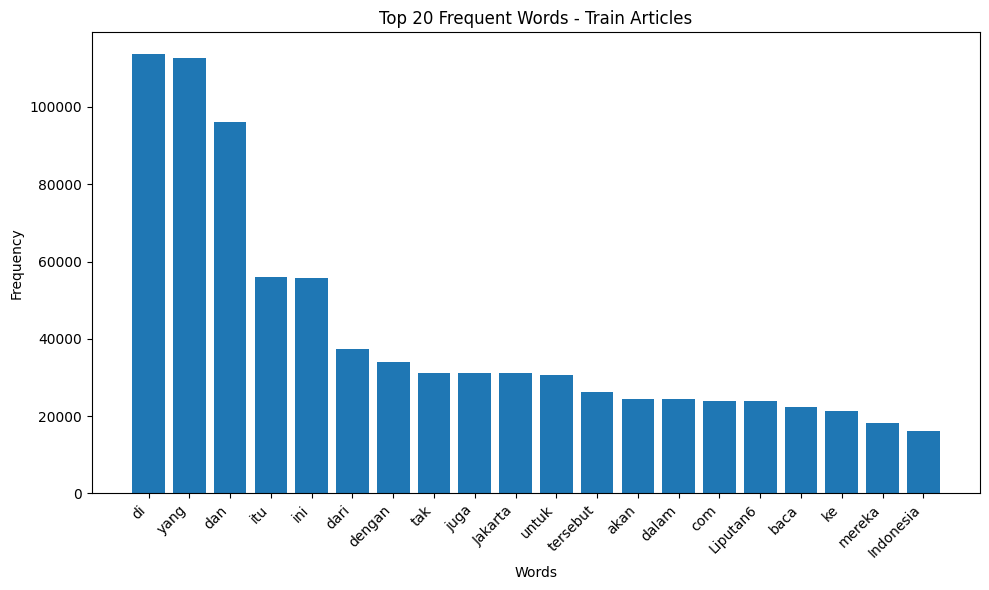

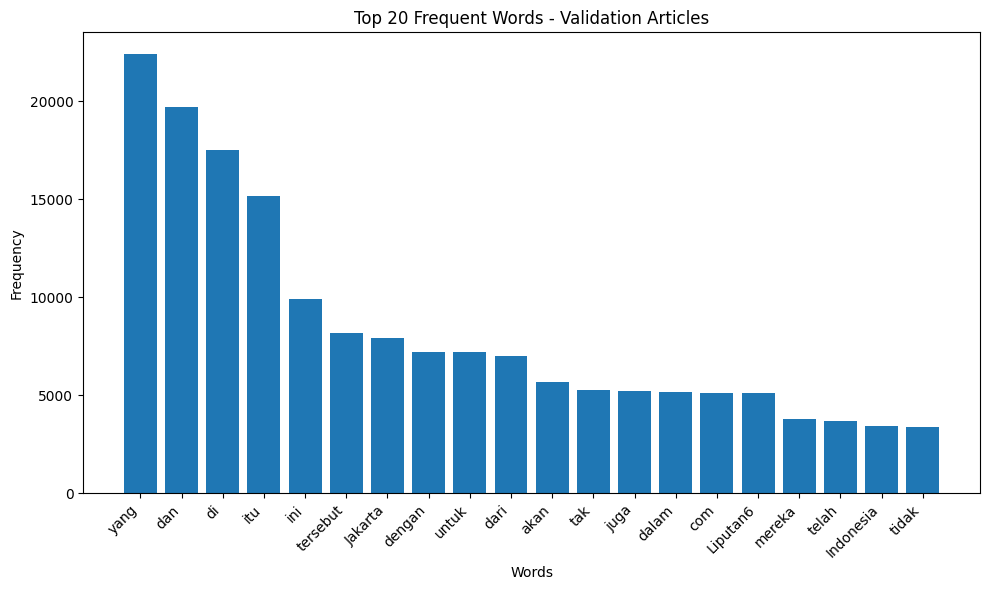

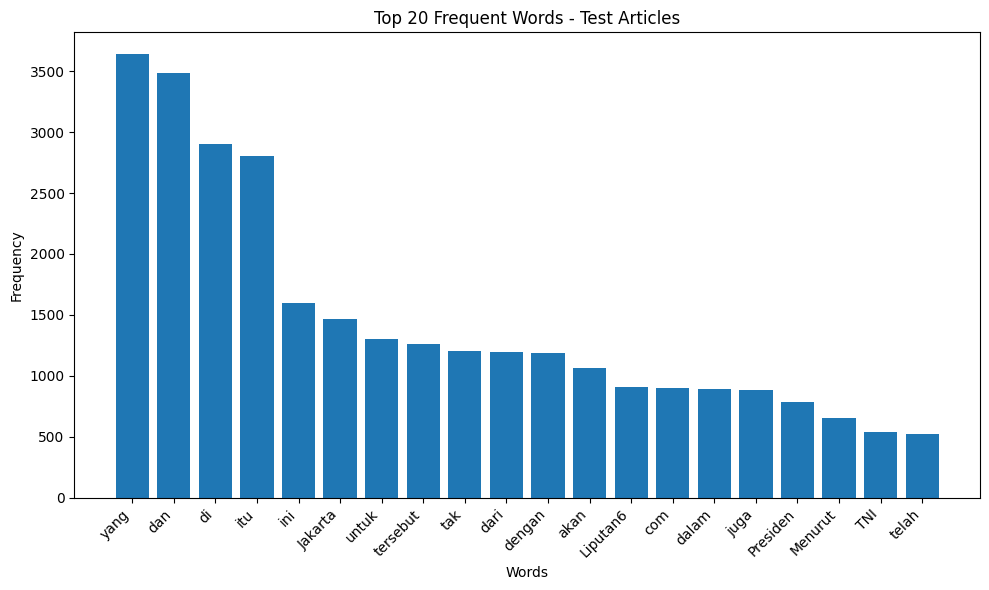

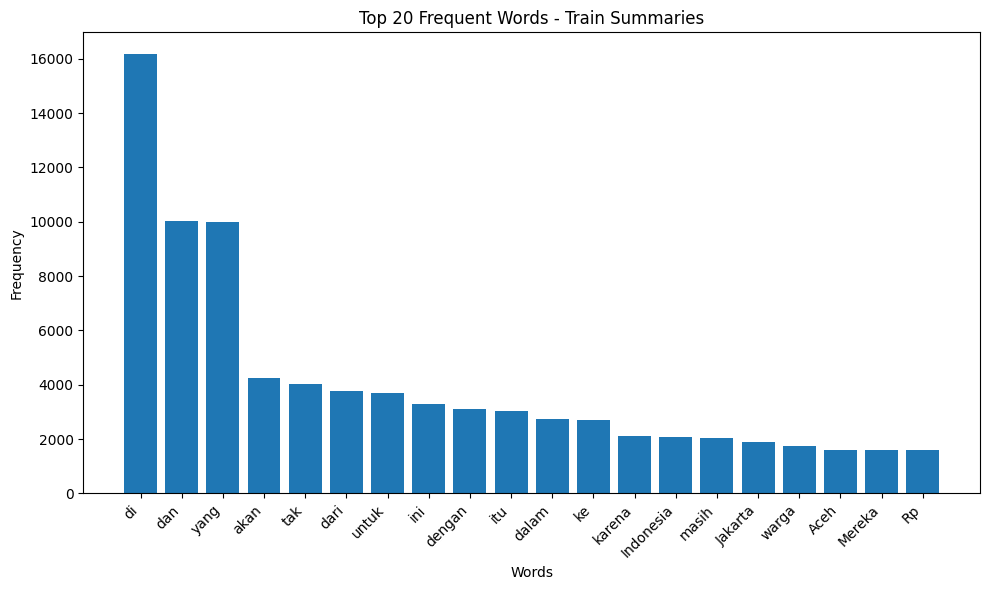

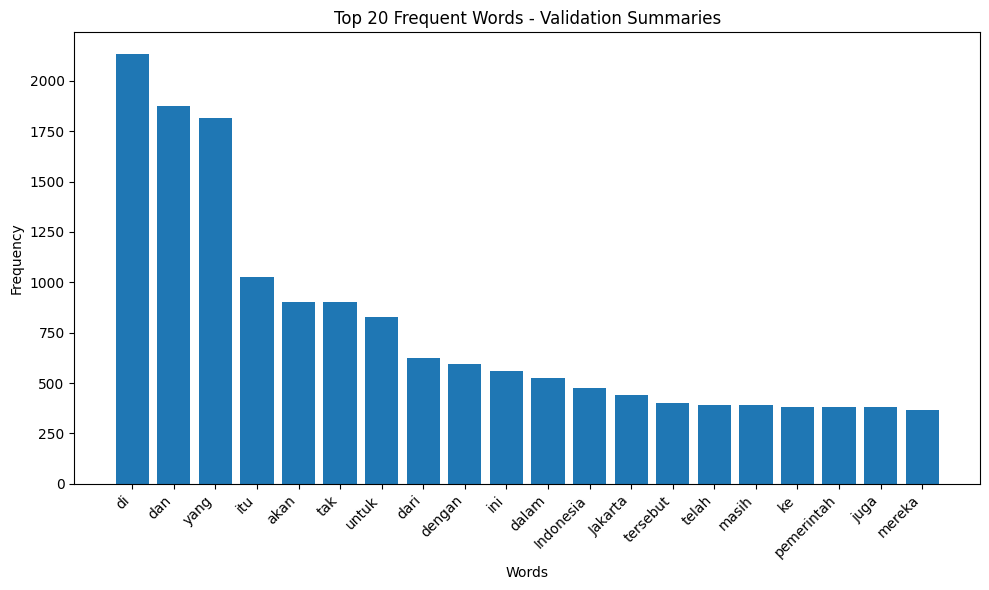

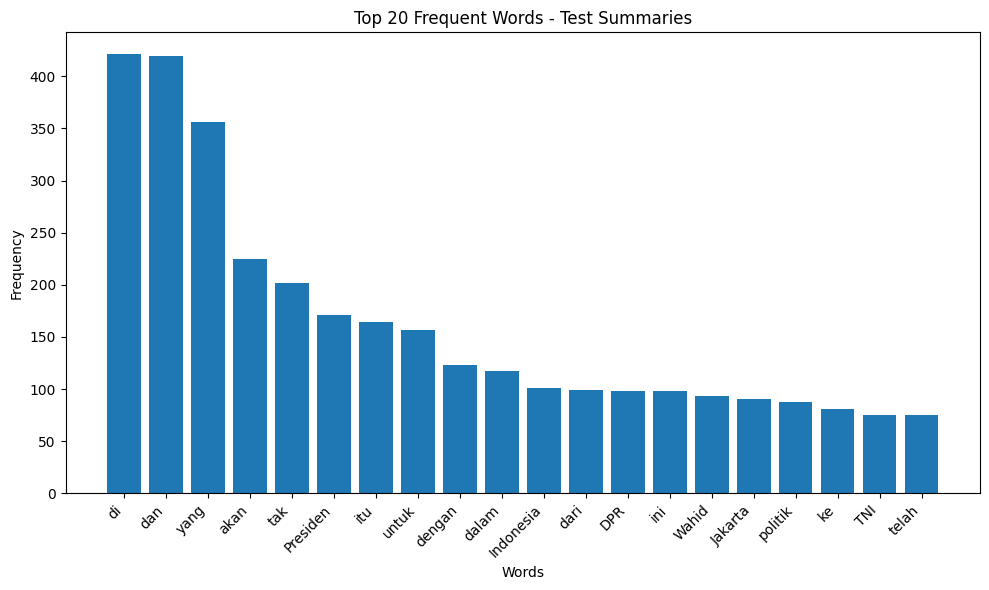

Top 20 words in Train Articles:
di: 113622
yang: 112559
dan: 96042
itu: 56128
ini: 55819
dari: 37348
dengan: 34123
tak: 31218
juga: 31186
Jakarta: 31155
untuk: 30684
tersebut: 26138
akan: 24547
dalam: 24426
com: 23951
Liputan6: 23913
baca: 22369
ke: 21239
mereka: 18299
Indonesia: 16031
--------------------
Top 20 words in Validation Articles:
yang: 22401
dan: 19704
di: 17518
itu: 15189
ini: 9920
tersebut: 8198
Jakarta: 7932
dengan: 7224
untuk: 7190
dari: 7012
akan: 5670
tak: 5255
juga: 5231
dalam: 5160
com: 5134
Liputan6: 5125
mereka: 3792
telah: 3712
Indonesia: 3425
tidak: 3376
--------------------
Top 20 words in Test Articles:
yang: 3637
dan: 3487
di: 2899
itu: 2808
ini: 1596
Jakarta: 1466
untuk: 1303
tersebut: 1263
tak: 1204
dari: 1198
dengan: 1188
akan: 1067
Liputan6: 907
com: 904
dalam: 891
juga: 885
Presiden: 785
Menurut: 654
TNI: 535
telah: 523
--------------------
Top 20 words in Train Summaries:
di: 16162
dan: 10012
yang: 9995
akan: 4258
tak: 4038
dari: 3759
untuk: 3708
ini: 

In [ ]:
# Top 20 Words
from collections import Counter

def plot_top_words(data, title):
    word_counts = Counter(" ".join(data).split())
    top_words = word_counts.most_common(20)
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Top 20 Frequent Words - {title}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return dict(top_words)

train_article_top_words = plot_top_words(data_train['detokenized_article'], "Train Articles")
val_article_top_words = plot_top_words(data_val['detokenized_article'], "Validation Articles")
test_article_top_words = plot_top_words(data_test['detokenized_article'], "Test Articles")

train_summary_top_words = plot_top_words(data_train['detokenized_summary'], "Train Summaries")
val_summary_top_words = plot_top_words(data_val['detokenized_summary'], "Validation Summaries")
test_summary_top_words = plot_top_words(data_test['detokenized_summary'], "Test Summaries")

def display_word_counts(word_dict, dataset_name):
    print(f"Top 20 words in {dataset_name}:")
    for word, count in word_dict.items():
        print(f"{word}: {count}")
    print("-" * 20)

display_word_counts(train_article_top_words, "Train Articles")
display_word_counts(val_article_top_words, "Validation Articles")
display_word_counts(test_article_top_words, "Test Articles")
display_word_counts(train_summary_top_words, "Train Summaries")
display_word_counts(val_summary_top_words, "Validation Summaries")
display_word_counts(test_summary_top_words, "Test Summaries")


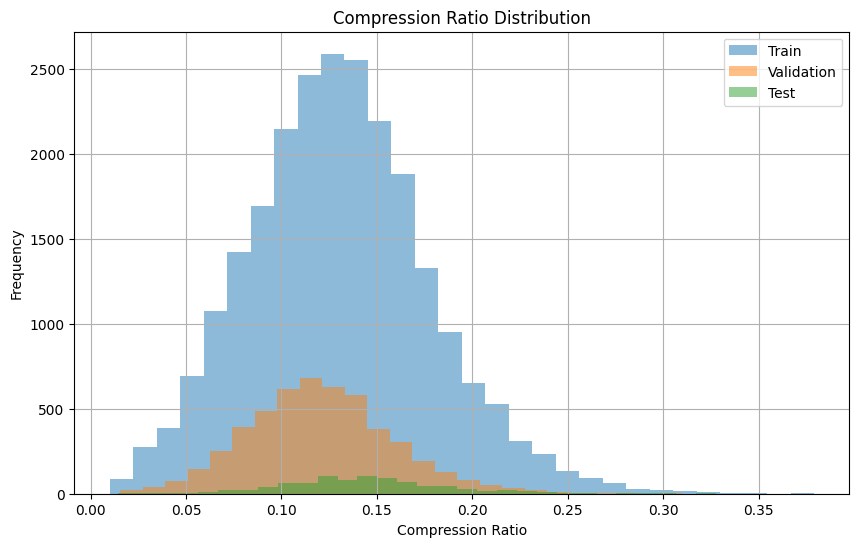

In [ ]:
# Compression Ratio Distribution
def calculate_compression_ratio(df):
  return df['detokenized_summary'].str.len() / df['detokenized_article'].str.len()

train_compression_ratios = calculate_compression_ratio(data_train)
val_compression_ratios = calculate_compression_ratio(data_val)
test_compression_ratios = calculate_compression_ratio(data_test)

plt.figure(figsize=(10, 6))
plt.hist(train_compression_ratios, bins=30, alpha=0.5, label='Train')
plt.hist(val_compression_ratios, bins=30, alpha=0.5, label='Validation')
plt.hist(test_compression_ratios, bins=30, alpha=0.5, label='Test')

plt.xlabel('Compression Ratio')
plt.ylabel('Frequency')
plt.title('Compression Ratio Distribution')
plt.legend(loc='upper right')  # Position the legend
plt.grid(True)
plt.show()


In [ ]:
!pip install wordcloud

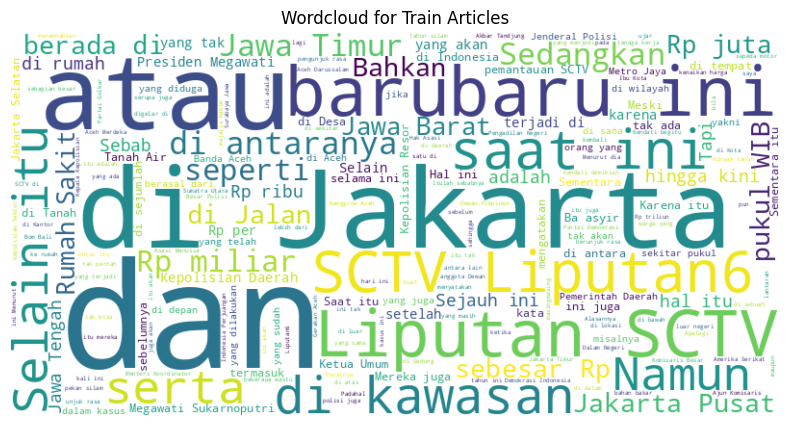

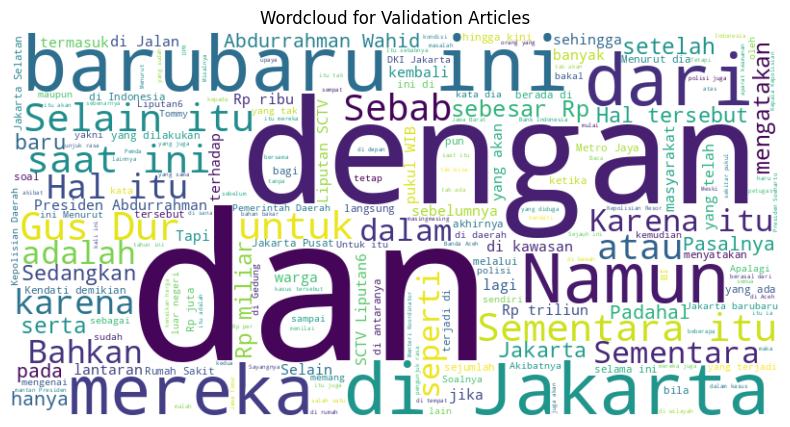

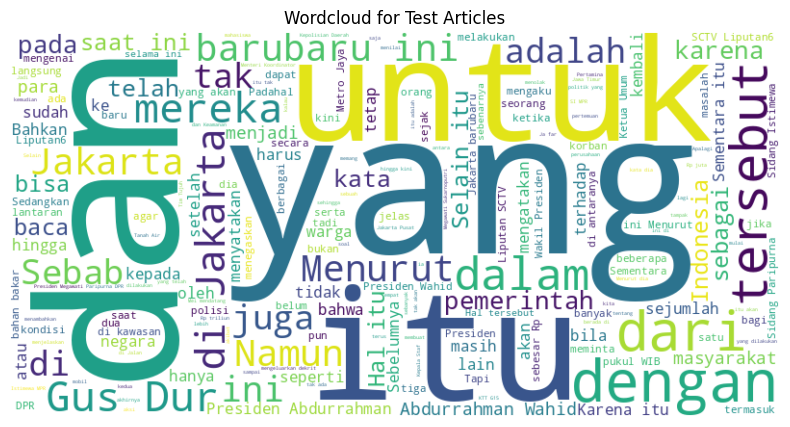

In [ ]:
# Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Assuming 'detokenized_article' column exists in your dataframes
create_wordcloud(" ".join(data_train['detokenized_article']), "Wordcloud for Train Articles")
create_wordcloud(" ".join(data_val['detokenized_article']), "Wordcloud for Validation Articles")
create_wordcloud(" ".join(data_test['detokenized_article']), "Wordcloud for Test Articles")


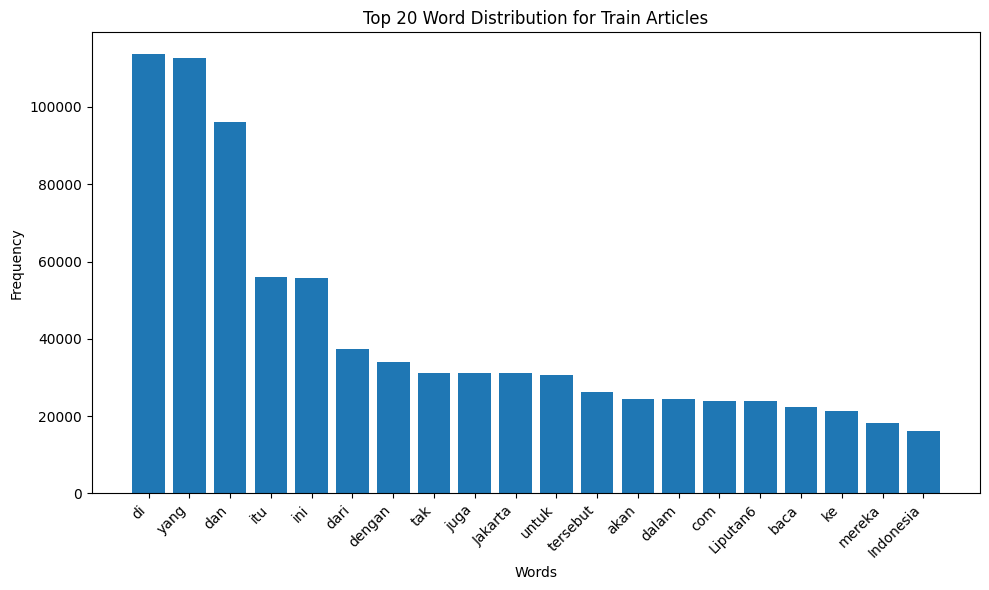

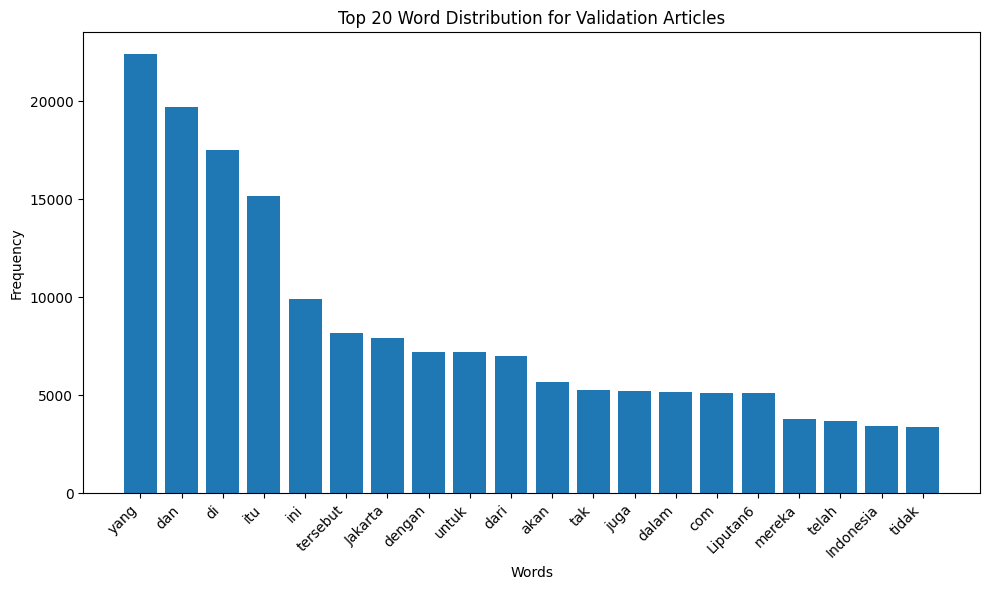

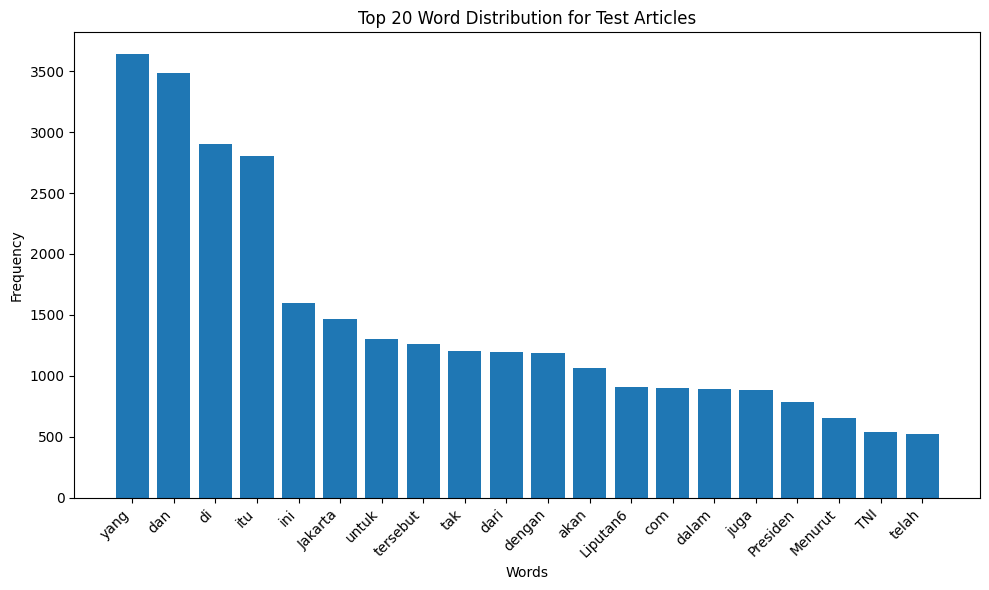

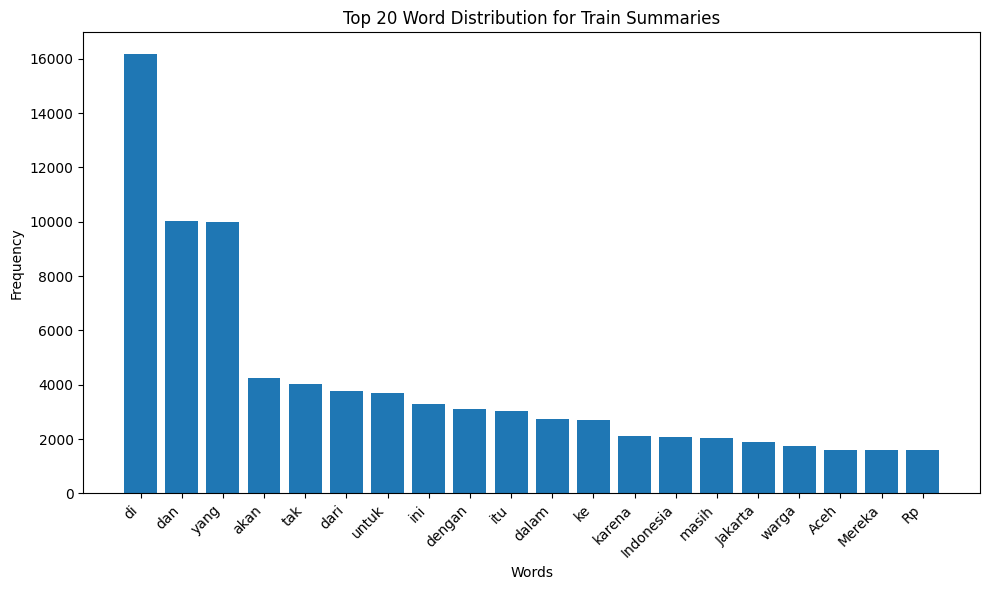

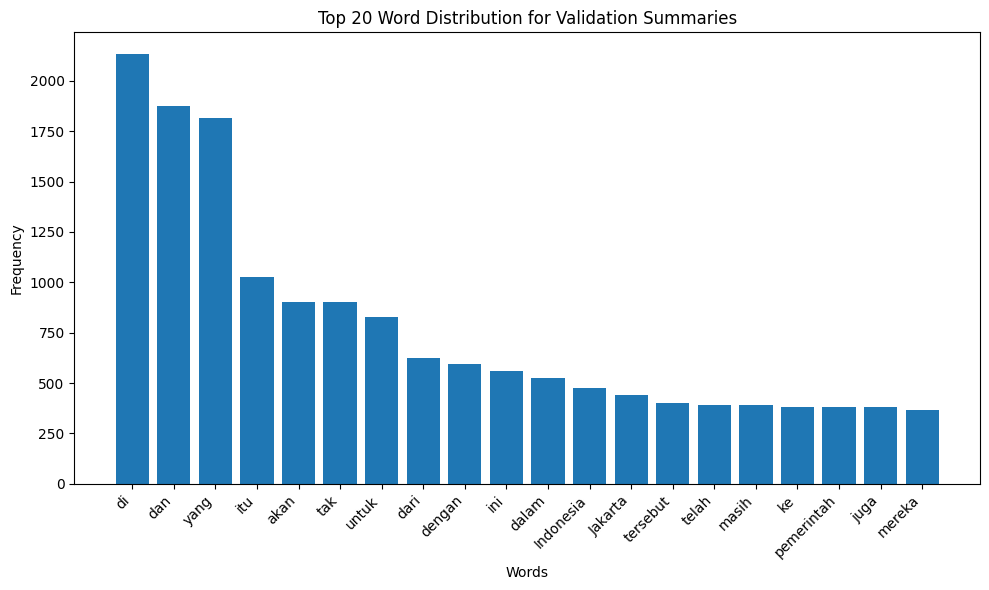

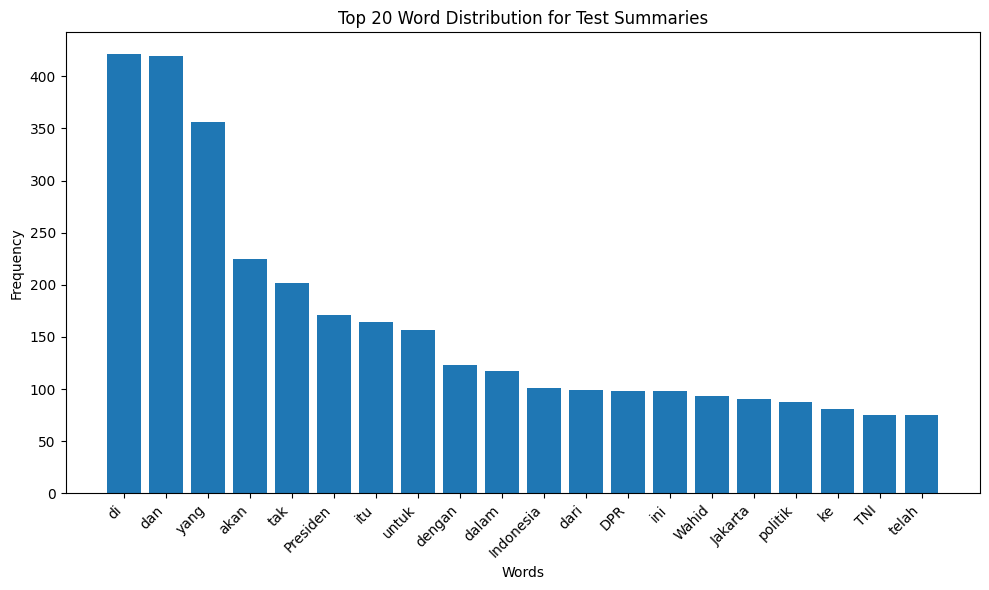

In [ ]:
# Word Distribution
def plot_word_distribution(df, column_name, label):
    word_counts = Counter(" ".join(df[column_name]).split())
    top_words = word_counts.most_common(20)
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Top 20 Word Distribution for {label}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_word_distribution(data_train, 'detokenized_article', 'Train Articles')
plot_word_distribution(data_val, 'detokenized_article', 'Validation Articles')
plot_word_distribution(data_test, 'detokenized_article', 'Test Articles')

plot_word_distribution(data_train, 'detokenized_summary', 'Train Summaries')
plot_word_distribution(data_val, 'detokenized_summary', 'Validation Summaries')
plot_word_distribution(data_test, 'detokenized_summary', 'Test Summaries')


## Cleaning Data

In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"[^\w\s]", "", text)
        text = re.sub(r"liputan6\s*\.*\s*com", "", text)
        stop_words = set(stopwords.words("indonesian"))
        filtered_text = [word for word in text if word not in stop_words]
        return text
    return ""

In [ ]:
def preprocess_dataset(df):
    data = df.copy()
    data["clean_article"] = data["detokenized_article"].apply(clean_text)
    data["clean_summary"] = data["detokenized_summary"].apply(clean_text)
    return data

In [ ]:
def remove_first_word(text):
    words = text.split()
    if words:
        return " ".join(words[1:])
    return text

In [ ]:
data_train = preprocess_dataset(data_train)
data_test = preprocess_dataset(data_test)
data_val = preprocess_dataset(data_val)

In [ ]:
data_train['clean_article'] = data_train['clean_article'].apply(remove_first_word)
data_test['clean_article'] = data_test['clean_article'].apply(remove_first_word)
data_val['clean_article'] = data_val['clean_article'].apply(remove_first_word)

In [ ]:
data_train.head()

,id,url,clean_article,clean_summary,extractive_summary,detokenized_article,detokenized_summary,article_word_count,summaries_word_count
0,65461,https://www.liputan6.com/news/read/65461/delap...,suasana duka menyelimuti proses pemakaman korb...,kedelapan jenazah akhirnya dimakamkan secara b...,"[1, 2]",Liputan6 com Brebes Suasana duka menyelimut...,Kedelapan jenazah akhirnya dimakamkan secara b...,232,28
1,65507,https://www.liputan6.com/news/read/65507/kapol...,kepala polri jenderal polisi da i bachtiar men...,doktor azhari lolos dari sergapan polisi di pe...,"[4, 6, 9, 2]",Liputan6 com Jakarta Kepala Polri Jenderal ...,Doktor Azhari lolos dari sergapan polisi di pe...,349,31
2,56708,https://www.liputan6.com/news/read/56708/tni-a...,pasukan tni angkatan laut memperagakan demonst...,saat mengunjungi daerah konflik rombongan pej...,"[6, 1, 9]",Liputan6 com Surabaya Pasukan TNI Angkatan ...,Saat mengunjungi daerah konflik rombongan pej...,172,26
3,53924,https://www.liputan6.com/news/read/53924/kejar...,slamet riyadi direktur pt maju rubber industri...,slamet riyadi direktur pt maju rubber industr...,"[0, 4]",Liputan6 com Kediri Slamet Riyadi Direktur...,Slamet Riyadi Direktur PT Maju Rubber Industr...,372,27
4,54274,https://www.liputan6.com/news/read/54274/pemer...,sekitar 300 tenaga kerja indonesia serta sejum...,ratusan tki minta pemerintah negaranegara asea...,"[5, 8]",Liputan6 com Mataram Sekitar 300 tenaga ker...,Ratusan TKI minta pemerintah negaranegara ASEA...,176,22


In [ ]:
data_test.head()

,id,url,clean_article,clean_summary,extractive_summary,detokenized_article,detokenized_summary,article_word_count,summaries_word_count
0,13352,https://www.liputan6.com/news/read/13352/penye...,petugas bea cukai tanjungbalai karimun riau ba...,penyelundupan ribuan ton kayu gelondongan dan ...,"[0, 6]",Liputan6 com Batam Petugas Bea Cukai Tanjun...,Penyelundupan ribuan ton kayu gelondongan dan ...,251,26
1,13634,https://www.liputan6.com/news/read/13634/presi...,presiden abdurrahman wahid secara formal menye...,rancangan pelimpahan wewenang dan tugas konsti...,"[0, 7]",Liputan6 com Jakarta Presiden Abdurrahman W...,Rancangan pelimpahan wewenang dan tugas konsti...,282,23
2,13615,https://www.liputan6.com/news/read/13615/ratus...,sebanyak 394 gerbong kereta api di wilayah dae...,pt pusri tak lagi menyewa 394 gerbong milik pt...,"[0, 8, 2]",Liputan6 com Jember Sebanyak 394 gerbong ke...,PT Pusri tak lagi menyewa 394 gerbong milik PT...,195,30
3,13757,https://www.liputan6.com/news/read/13757/hengk...,setelah menjalani pemeriksaan intensif artis f...,artis hengky tornando dijadikan tahanan resmi ...,"[1, 9]",Liputan6 com Jakarta Setelah menjalani peme...,Artis Hengky Tornando dijadikan tahanan resmi ...,207,31
4,13311,https://www.liputan6.com/news/read/13311/pasuk...,sekitar lima ribu pasukan akan dikerahkan untu...,pasukan pengamanan ktt g15 menggelar apel siag...,"[1, 3]",Liputan6 com Jakarta Sekitar lima ribu pasu...,Pasukan pengamanan KTT G15 menggelar apel siag...,162,27


In [ ]:
data_val.head()

,id,url,clean_article,clean_summary,extractive_summary,detokenized_article,detokenized_summary,article_word_count,summaries_word_count
0,5448,https://www.liputan6.com/news/read/5448/je-sah...,presiden abdurrahman wahid bisa saja menolak k...,mekanisme pemilihan ketua ma tak lepas dari ke...,"[14, 15]",Liputan6 com Jakarta Presiden Abdurrahman W...,Mekanisme pemilihan Ketua MA tak lepas dari ke...,457,28
1,941,https://www.liputan6.com/news/read/941/instruk...,kepolisian republik indonesia akan bersikap pr...,kepolisian republik indonesia merespon perinta...,"[0, 2]",Liputan6 com Jakarta Kepolisian Republik In...,Kepolisian Republik Indonesia merespon perinta...,138,21
2,2056,https://www.liputan6.com/news/read/2056/buruh-...,upah minumum regional sebesar rp 344 257 bagi ...,ratarata buruh di kalideres jakarta mengaku me...,"[3, 8]",Liputan6 com Jakarta Upah minumum regional ...,Ratarata buruh di Kalideres Jakarta mengaku me...,266,25
3,4550,https://www.liputan6.com/news/read/4550/tiga-p...,para nasabah bank di jakarta boleh sedikit ber...,tiga orang tersangka perampok yang sering meng...,"[1, 2]",Liputan6 com Jakarta Para nasabah bank di J...,Tiga orang tersangka perampok yang sering meng...,263,25
4,4288,https://www.liputan6.com/news/read/4288/dua-ca...,sebanyak 12 hakim agung yang menjadi calon ket...,sistem gugur pemilihan calon ketua ma sudah te...,"[2, 20]",Liputan6 com Jakarta Sebanyak 12 Hakim Agun...,Sistem gugur pemilihan calon Ketua MA sudah te...,437,26


In [ ]:
# Ambil Kolom yang Dibutuhkan
data_train = data_train[[ 'clean_article', 'clean_summary']]
data_test = data_test[[ 'clean_article', 'clean_summary']]
data_val = data_val[[ 'clean_article', 'clean_summary']]

In [ ]:
data_train.head()

,clean_article,clean_summary
0,suasana duka menyelimuti proses pemakaman korb...,kedelapan jenazah akhirnya dimakamkan secara b...
1,kepala polri jenderal polisi da i bachtiar men...,doktor azhari lolos dari sergapan polisi di pe...
2,pasukan tni angkatan laut memperagakan demonst...,saat mengunjungi daerah konflik rombongan pej...
3,slamet riyadi direktur pt maju rubber industri...,slamet riyadi direktur pt maju rubber industr...
4,sekitar 300 tenaga kerja indonesia serta sejum...,ratusan tki minta pemerintah negaranegara asea...


In [ ]:
data_test.head()

,clean_article,clean_summary
0,petugas bea cukai tanjungbalai karimun riau ba...,penyelundupan ribuan ton kayu gelondongan dan ...
1,presiden abdurrahman wahid secara formal menye...,rancangan pelimpahan wewenang dan tugas konsti...
2,sebanyak 394 gerbong kereta api di wilayah dae...,pt pusri tak lagi menyewa 394 gerbong milik pt...
3,setelah menjalani pemeriksaan intensif artis f...,artis hengky tornando dijadikan tahanan resmi ...
4,sekitar lima ribu pasukan akan dikerahkan untu...,pasukan pengamanan ktt g15 menggelar apel siag...


In [ ]:
data_val.head()

,clean_article,clean_summary
0,presiden abdurrahman wahid bisa saja menolak k...,mekanisme pemilihan ketua ma tak lepas dari ke...
1,kepolisian republik indonesia akan bersikap pr...,kepolisian republik indonesia merespon perinta...
2,upah minumum regional sebesar rp 344 257 bagi ...,ratarata buruh di kalideres jakarta mengaku me...
3,para nasabah bank di jakarta boleh sedikit ber...,tiga orang tersangka perampok yang sering meng...
4,sebanyak 12 hakim agung yang menjadi calon ket...,sistem gugur pemilihan calon ketua ma sudah te...


In [ ]:
# data_train.to_csv('data_train.csv', index=False)
# data_val.to_csv('data_val.csv', index=False)
# data_test.to_csv('data_test.csv', index=False)


# Modelling

In [ ]:
from transformers import BertTokenizer, EncoderDecoderModel

tokenizer = BertTokenizer.from_pretrained("cahya/bert2bert-indonesian-summarization")
model = EncoderDecoderModel.from_pretrained("cahya/bert2bert-indonesian-summarization")

Config of the encoder: <class 'transformers.models.bert.modeling_bert.BertModel'> is overwritten by shared encoder config: BertConfig {
  "_name_or_path": "cahya/bert-base-indonesian-1.5G",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.48.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

Config of the decoder: <class 'transformers.models.bert.modeling_bert.BertLMHeadModel'> is overwritten by shared decoder config: BertConfig {
  "_name_or_path": "cahya/bert-base-indonesian-1.5G",
  "add_cross_attent

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class SummarizationDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=512):
        self.tokenizer = tokenizer
        self.data = data
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        article = self.data.iloc[idx]['clean_article']
        summary = self.data.iloc[idx]['clean_summary']

        input_ids = self.tokenizer.encode(article,
                                          max_length=self.max_length,
                                          truncation=True,
                                          padding="max_length",
                                          return_tensors='pt').squeeze()

        labels = self.tokenizer.encode(summary,
                                       max_length=self.max_length,
                                       truncation=True,
                                       padding="max_length",
                                       return_tensors='pt').squeeze()

        return {'input_ids': input_ids, 'labels': labels}

In [ ]:
train_dataset = SummarizationDataset(data_train, tokenizer)
val_dataset = SummarizationDataset(data_val, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        if self.label_smoother is not None and "labels" in inputs:
            labels = inputs.pop("labels")
        else:
            labels = None

        outputs = model(**inputs)
        if self.args.past_index >= 0:
            self._past = outputs[self.args.past_index]

        if labels is not None:
            loss = self.label_smoother(outputs, labels)
        else:
            loss = outputs["loss"] if isinstance(outputs, dict) else outputs[0]

        return (loss, outputs) if return_outputs else loss

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-109-64d2f31a08f8>:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(
/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:629: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:649: FutureWarning: Version v4.12.0 introduces a bet

Epoch,Training Loss,Validation Loss
1,0.088000,0.140024
2,0.058800,0.147580


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 40, 'min_length': 20, 'early_stopping': True, 'num_beams': 10, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:629: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:649: FutureWarning: Version v4.12.0 introduce

# Model Evaluation

In [ ]:
pip install rouge-score nltk


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=84b2963ca5d4ca86e9ec15e7fa789a8e0a11577236a3af3bb5f65ba178ed283f
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

def evaluate_summaries(true_summaries, generated_summaries):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    for true_summary, generated_summary in zip(true_summaries, generated_summaries):
        true_summary = " ".join(true_summary) if isinstance(true_summary, list) else true_summary
        generated_summary = " ".join(generated_summary) if isinstance(generated_summary, list) else generated_summary

        scores = scorer.score(true_summary, generated_summary)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)

    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)

    print(f"ROUGE-1 F1 Score: {avg_rouge1:.4f}")
    print(f"ROUGE-2 F1 Score: {avg_rouge2:.4f}")
    print(f"ROUGE-L F1 Score: {avg_rougeL:.4f}")

true_summaries = data_test['clean_summary']
generated_summaries = []

device = next(model.parameters()).device

for article in data_test['clean_article']:
    input_ids = tokenizer.encode(article,
                                  max_length=512,  # Limit to max_length
                                  truncation=True,
                                  padding="max_length",
                                  return_tensors='pt').to(device)

    summary_ids = model.generate(input_ids,
            min_length=20,
            max_length=80,
            num_beams=10,
            repetition_penalty=2.5,
            length_penalty=1.0,
            early_stopping=True,
            no_repeat_ngram_size=2,
            use_cache=True,
            do_sample=True,
            temperature=0.8,
            top_k=50,
            top_p=0.95)

    summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    generated_summaries.append(summary_text)

# Evaluate the generated summaries
evaluate_summaries(true_summaries, generated_summaries)

ROUGE-1 F1 Score: 0.3848
ROUGE-2 F1 Score: 0.2017
ROUGE-L F1 Score: 0.3186


In [ ]:
def summarize_text(text):
    device = next(model.parameters()).device

    input_ids = tokenizer.encode(text,
                                  max_length=512,  # Limit to max_length
                                  truncation=True,  # Truncate if longer
                                  padding="max_length",  # Pad if shorter
                                  return_tensors='pt').to(device)

    summary_ids = model.generate(input_ids,
            min_length=20,
            max_length=80,
            num_beams=10,
            repetition_penalty=2.5,
            length_penalty=1.0,
            early_stopping=True,
            no_repeat_ngram_size=2,
            use_cache=True,
            do_sample=True,
            temperature=0.8,
            top_k=50,
            top_p=0.95)

    summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary_text

text_to_summarize = "Polisi menangkap dua tersangka kasus pembunuhan di Jakarta. Tersangka bernama Darmawan dan Hendrik mengakui telah membunuh korban pada tanggal 21 Maret. Polisi masih melakukan penyelidikan mendalam terhadap kasus ini. Menurut Kepala Polres Jakarta Barat Komisaris Besar Polisi Agus Santoso, pelaku telah melakukan kejahatan ini untuk mengambil harta korban. Penyidik telah mengumpulkan barang bukti berupa senjata tajam dan uang tunai sejumlah Rp 150 juta. Pihak kepolisian menyampaikan bahwa proses pengadilan akan segera dimulai dalam waktu dekat." #@param {type:"string"}
summary = summarize_text(text_to_summarize)
summary


'dua tersangka kasus pembunuhan di jakarta mengaku telah membunuh korban pada tanggal 21 maret proses pengadilan akan segera dimulai dalam waktu dekat'

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil
